 1. Implement KNN algorithm without using sci-kit learn library in Python. Use Iris dataset.


In [100]:
import pandas as pd
import numpy as np
import operator

In [118]:
# loading data file into the program. 

dataset = pd.read_csv('iris.data', header = None, sep =",", names =['sepal length', 'sepal width', 'petal length', 'petal width', 'Class'])
print(dataset.head()) # prints first five tuples of your data.

   sepal length  sepal width  petal length  petal width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [119]:
# making function for calculating euclidean distance
def E_Distance(x1, x2, length):
    distance = 0
    for x in range(length):
        distance += np.square(x1[x] - x2[x])
    return np.sqrt(distance)

# making function for defining K-NN model

def knn(trainingSet, testInstance, k):
    distances = {}
    length = testInstance.shape[1]  #The shape attribute for numpy arrays returns the dimensions of the array. 
   
    
    for x in range(len(trainingSet)):
        dist = E_Distance(testInstance, trainingSet.iloc[x], length)
        #print(dist)
        distances[x] = dist[0]
        
     #Sort the data in data file .    
    sortdist = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(sortdist[x][0])
    Count = {}  # to get most frequent class of rows
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in Count:
            Count[response] += 1
        else:
            Count[response] = 1
    sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True)
    return (sortcount[0][0], neighbors)


#making test data set
testSet = [[6.8, 3.4, 4.8, 2.4]]
test = pd.DataFrame(testSet)

In [120]:
# assigning different values to k
k = 1
k1 = 5
k2 = 11

# supplying test data to the model

result, neigh = knn(dataset, test, k)
result1, neigh1 = knn(dataset, test, k1)
result2, neigh2 = knn(dataset, test, k2)

# printing output prediction

print(result)
print(neigh)
print(result1)
print(neigh1)
print(result2)
print(neigh2)

Iris-virginica
[141]
Iris-virginica
[141, 145, 110, 115, 139]
Iris-virginica
[141, 145, 110, 115, 139, 147, 77, 148, 140, 112, 144]


2. Split the Iris dataset into 60% train and 40% test. Evaluate (find accuracy) of KNN algorithm on different values of K. Use sci-kit learn library to execute KNN algorithm. Take K = 1, 3, 5, 7, 9. Using matplotlib library, draw accuracy (X-axis) vs K (Y-axis) plot. 

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

#read in the data using pandas
iris = pd.read_csv('iris.data', header = None, sep =",", names =['sepal length', 'sepal width', 'petal length', 'petal width', 'Class'])

print(iris.shape)
iris.head()

(150, 5)


,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
# Feature matrix in a object named X
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris[features]
# response vector in a object named y
target = ['Class']
y = iris[target]

In [92]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [134]:
# splitting the data into training and test sets (60:40)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.6, train_size = 0.4)

In [135]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(75, 4)
(75, 4)


In [136]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(75, 1)
(75, 1)


In [137]:
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy
from sklearn import metrics
#Try running from k=1, 3,5,7,9 and record testing accuracy
k_range = [1,3,5,7,9,11]
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [138]:
scores

{1: 0.9466666666666667,
 3: 0.96,
 5: 0.9466666666666667,
 7: 0.96,
 9: 0.9466666666666667,
 11: 0.9466666666666667}

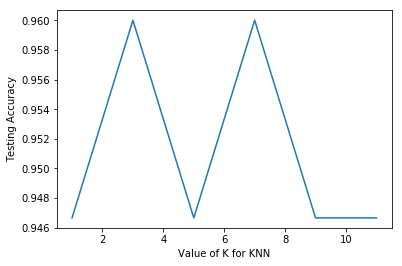

In [139]:
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [85]:
#knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X,y.values.ravel())

3. Run Naive Bayes algorithm using sci-kit learn library in Python.

a) Weather dataset: Use dummy values for training, refer tutorial. For testing also, use dummy values as per tutorial.


In [86]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print ("Weather:" ,weather_encoded)

# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print ("Temp:",temp_encoded)
print ("Play:",label)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [141]:
#Combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))
print (features)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[2,1]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]
Predicted Value: [0]


b) Wine dataset: Find accuracy of the model.

For 3(b), run naive bayes for different configurations of train:test split, namely 50:50, 60:40, 70:30, 80:20 and 90:10. For each configuration, compute precision and recall values (both expressed as percentage). Use matplotlib to draw bar plots (in single plot) for precision & recall for each configuration. On X-axis, write configurations and on Y-axis is percentage to represent precision and recall. Use red bar for precision and blue bar for recall.


In [131]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics


#Load dataset
wine = datasets.load_wine()
print (wine.feature_names)
print (wine.target_names)
print (wine.target)



['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [132]:
#from sklearn.cross_validation import train_test_split
k=(0.5,0.4,0.3,0.2,0.1)
recall=[]
precision=[]
for i in k:
   
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=i,random_state=109)
    gnb = GaussianNB()

    #Train the model using the training sets
    gnb.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = gnb.predict(X_test)
    print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))  
    precision.append(metrics.precision_score(y_test, y_pred, average="macro"))
    print("Recall:",metrics.recall_score(y_test, y_pred, average="macro"))
    recall.append(metrics.recall_score(y_test, y_pred, average="macro"))

Precision: 0.9543266769073222
Recall: 0.957997311827957
Precision: 0.9310628019323671
Recall: 0.93482905982906
Precision: 0.9071969696969697
Recall: 0.9139515455304928
Precision: 0.9259259259259259
Recall: 0.9583333333333334
Precision: 0.875
Recall: 0.9107142857142857


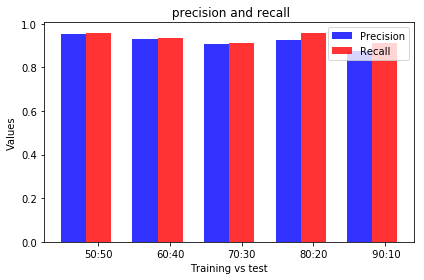

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width,
alpha=opacity,
color='b',
label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='r',
label='Recall')

plt.xlabel('Training vs test')
plt.ylabel('Values')
plt.title(' precision and recall')
plt.xticks(index + bar_width, ('50:50', '60:40', '70:30', '80:20',' 90:10'))
plt.legend()

plt.tight_layout()
plt.show()

4. Use Naive Bayes to perform sentiment analysis.

a) Pre-processing text using NLP.

b) Bag-of-Word models: Representing a document (in this case a review comment) as a vector (sequence of word counts or TF-IDF).


Run naive bayes for different configurations of train:test split, namely 50:50, 60:40, 70:30, 80:20 and 90:10. For each configuration, compute accuracy (expressed as percentage). Use matplotlib to draw graph for accuracy percentages for each configuration. On X-axis, write configurations and on Y-axis is percentage to represent accuracy.



In [169]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RICHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [150]:
#Sentence Tokenisation
from nltk.tokenize import sent_tokenize

text="Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [151]:
#Word Tokenisation

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [154]:
#stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'again', 'needn', 'most', 'further', 'do', 'they', 've', 'y', 'any', 'himself', 'not', 'ma', 'd', 'has', 'or', 't', 'each', 'above', "wouldn't", 'myself', 'she', 'were', 'for', 'about', 'these', 'where', 'how', 'too', "you've", 'his', 'so', "isn't", "aren't", 'very', "hadn't", 'below', 'weren', 'to', 'under', 'through', 'only', 'ours', 'before', 'from', "mustn't", 'just', 'until', 're', "it's", 'am', "haven't", 'a', 'have', 'few', "should've", "won't", 'was', 'did', 'both', 'that', 'yours', "that'll", 'we', 'doesn', 'ourselves', 'itself', 'there', 'yourselves', "hasn't", 'an', 'herself', "doesn't", 'up', 'it', 'can', 'after', 'when', 'didn', 'own', 'what', "needn't", 'had', 'over', "you'd", 'off', 'into', 'of', 'won', "shouldn't", 'while', 'with', 'hasn', 'by', 'will', 'ain', 'her', 'theirs', 'which', 'the', 'this', "you're", 's', 'he', "weren't", 'be', 'haven', 'couldn', "didn't", "she's", 'those', 'having', 'hadn', 'them', 'does', 'o', 'some', 'once', 'down', 'll', 'whom', 'than', "

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RICHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
#Removing Stop words

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
        
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


In [160]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


In [162]:
#Lexicon Normalization
#performing stemming and Lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RICHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


Lemmatized Word: fly
Stemmed Word: fli


In [165]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as pt
import numpy as np


movie_data = pd.read_csv("train.tsv" , sep='\t')
movie_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [166]:
split_bow = 0.5

tokens = RegexpTokenizer('r[a-zA-Z0-9]+')

#pre-processing
#bag of words
cv = CountVectorizer(lowercase=True, stop_words="english", ngram_range=(1,1), tokenizer=tokens.tokenize)

#data set to bag of words
bow = cv.fit_transform(movie_data['Phrase'])

#print(bow)

target_data = movie_data['Sentiment']

accuracy_bow = []

for i in range(5):
    train_input, test_input, train_target, test_target = train_test_split(bow, target_data, test_size=split_bow, random_state=1, stratify=target_data)

    model = MultinomialNB().fit(train_input, train_target)
    predicted_output = model.predict(test_input)
    acc = model.score(test_input, test_target)
    accuracy_bow.append(acc*100)
   
    split_bow = split_bow - 0.1
   



C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ral', 'rd', 'rds', 'ready', 'reafter', 'reas', 'reby', 'red', 'ree', 'refore', 'rehand', 'rein', 'reover', 'rest', 'reupon', 'rever', 'rhaps', 'ribe', 'ring', 'rious', 'rly', 'rmer', 'rmerly', 'rom', 'ront', 'ross', 'rough', 'roughout', 'round', 'rs', 'rself', 'rselves', 'rst', 'rt', 'rtheless', 'rther', 'rty', 'ru', 'rwards', 'rwise', 'ry', 'ryone', 'rything', 'rywhere'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[54.224016403947196, 54.36210431885172, 54.625258976056735, 54.65030596225932, 55.09707182674441]


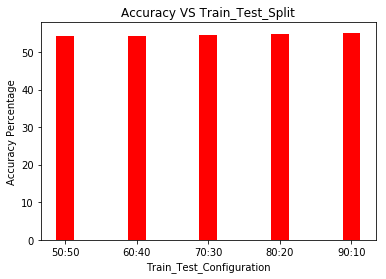

In [168]:
index = np.arange(len(accuracy_bow))
bar_width = 0.25

print(accuracy_bow)

#vocab = cv.get_feature_names()
#print(vocab)

graph = pt.bar(index, accuracy_bow, bar_width, align='center', color='r')
pt.xticks(index, ('50:50', '60:40', '70:30', '80:20', '90:10'))
pt.title("Accuracy VS Train_Test_Split")
pt.xlabel("Train_Test_Configuration")
pt.ylabel("Accuracy Percentage")


pt.show()               

